# Notebook 2: Data Visualization

### Exploratory Data Analysis (EDA)
Objective:
Explore trends in wildfire size, frequency, and duration over time, and see how they vary by cause or region.

### Step 1: Import libraries + Load CSV files

The libraries below will allow us to work with our datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import DBSCAN
import geopandas as gpd

# Load cleaned datasets
df1 = pd.read_csv("dataset1_cleaned.csv")    
df2 = pd.read_csv("dataset2_cleaned.csv")  
df3 = pd.read_csv("dataset3_cleaned.csv")     

### Step 2: Exploratory Analysis

Analyzing Datasets and Creating Visualizations.

### a. Wildfire Trends Over Time
#### Introduction:
This section examines how wildfire activity has evolved in California over time. By analyzing annual fire counts, total and average acreage burned, and fire durations, we aim to understand whether wildfires are becoming more frequent, larger, or longer-lasting.

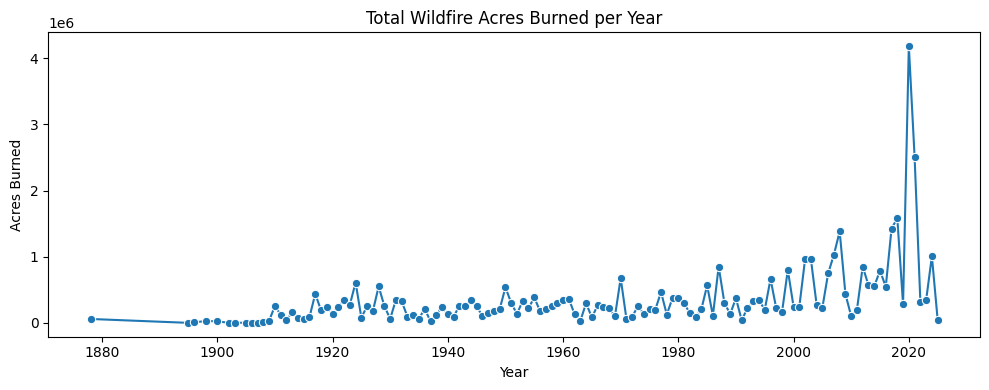

In [2]:
size_by_year = df2.groupby("year")["gis_calculated_acres"].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=size_by_year, x="year", y="gis_calculated_acres", marker="o")
plt.title("Total Wildfire Acres Burned per Year")
plt.xlabel("Year")
plt.ylabel("Acres Burned")
plt.tight_layout()
plt.show()

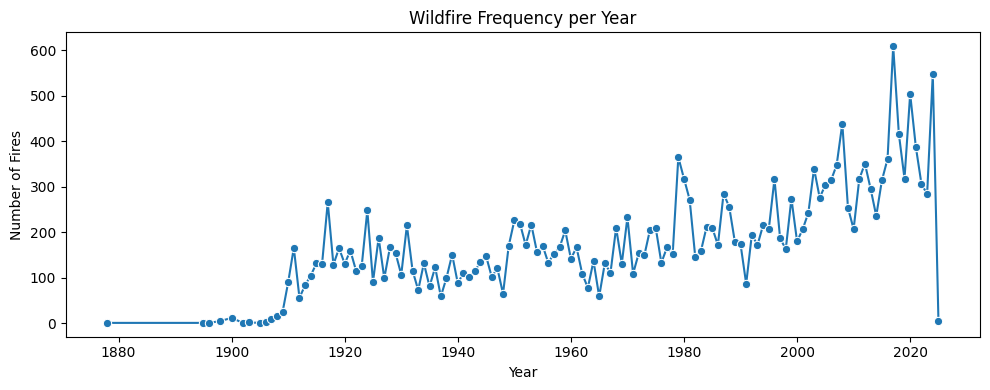

In [3]:
fires_per_year = df2.groupby("year")["objectid"].count().reset_index(name="fire_count")

plt.figure(figsize=(10, 4))
sns.lineplot(data=fires_per_year, x="year", y="fire_count", marker="o")
plt.title("Wildfire Frequency per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.show()

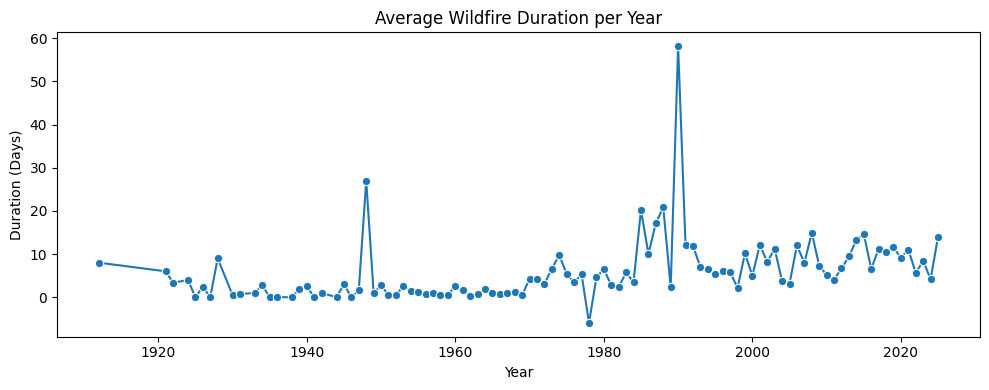

In [4]:
# Ensure date columns are datetime
df2["alarm_date"] = pd.to_datetime(df2["alarm_date"])
df2["containment_date"] = pd.to_datetime(df2["containment_date"])

# Calculate duration
df2["duration_days"] = (df2["containment_date"] - df2["alarm_date"]).dt.days

# Average duration by year
duration_by_year = df2.groupby("year")["duration_days"].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=duration_by_year, x="year", y="duration_days", marker="o")
plt.title("Average Wildfire Duration per Year")
plt.xlabel("Year")
plt.ylabel("Duration (Days)")
plt.tight_layout()
plt.show()

#### Summary (Wildfire Trends Over Time):
The analysis shows that both the number of wildfires and the total acres burned in California have increased significantly over the past two decades. While many fires remain small, the presence of a few extremely large fires has caused sharp spikes in total area burned. Additionally, the average duration of wildfires has gradually increased, indicating that fires are lasting longer, likely due to a combination of hotter conditions and more challenging containment.

### b. Cause and Region Variability
#### Introduction:

Wildfires originate from various ignition sources and impact regions differently. This section groups fire data by cause (e.g., human, lightning, utility) and by location (county, state) to analyze how frequency and severity differ across causes and geographic areas.


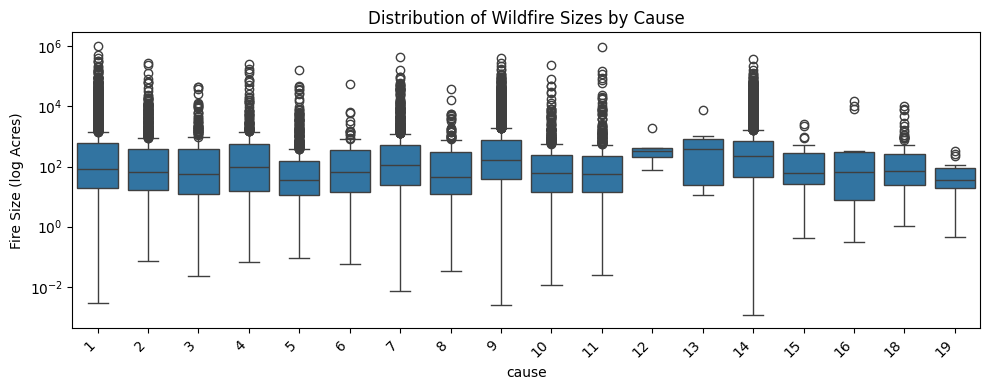

In [5]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df2, x="cause", y="gis_calculated_acres")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Wildfire Sizes by Cause")
plt.yscale("log")  # optional if sizes are skewed
plt.ylabel("Fire Size (log Acres)")
plt.tight_layout()
plt.show()

| Cause Code | Cause Description           | Cause Group |
|------------|-----------------------------|-------------|
| 1          | Lightning                   | Natural     |
| 2          | Equipment Use               | Human       |
| 3          | Smoking                     | Human       |
| 4          | Campfire                    | Human       |
| 5          | Debris Burning              | Human       |
| 6          | Railroad                   | Human       |
| 7          | Arson                       | Human       |
| 8          | Children Playing with Fire  | Human       |
| 9          | Miscellaneous               | Human       |
| 10         | Vehicle                     | Human       |
| 11         | Powerlines (Utility)        | Utility     |
| 12         | Fireworks                   | Human       |
| 13         | Structure Fire              | Human       |
| 14         | Railroad (Other)            | Human       |
| 15         | Electrical Power (Utility)  | Utility     |
| 16         | Equipment Use (Other)       | Human       |
| 17         | Miscellaneous (Other)       | Human       |
| 18         | Undetermined                | Other       |
| 19         | Unknown                     | Other       |


In [6]:
df3[["county", "risk_score"]].sort_values("risk_score", ascending=False)

,county,risk_score
18,Los Angeles,100.000000
32,Riverside,99.936367
35,San Bernardino,99.904550
0,Alameda,99.872733
42,Santa Clara,99.840916
29,Orange,99.777283
36,San Diego,99.681833
6,Contra Costa,99.586382
55,Ventura,99.427299
41,Santa Barbara,99.395482


#### Summary (Cause and Region Variability):

The distribution of wildfire sizes by cause reveals that lightning-caused fires tend to be larger on average, while human-caused fires are more frequent but typically smaller in size. This aligns with known patterns of natural vs. anthropogenic ignitions. The table of wildfire risk scores by county gives more context on which areas are most at risk. Some counties may not have the most fires, but their high risk scores mean they could still be heavily impacted if a fire does happen.

### c. Geospatial Analysis
#### Introduction:

In this section, we map fire activity across California to identify spatial patterns and high-risk areas. The Choropleth map reveal fire concentrations by county, while DBSCAN clustering algorithms help detect ignition hotspots.

 Part B: Geospatial Analysis
Goal: Understand the spatial distribution of wildfires across California and identify high-risk areas using visual and quantitative methods.

In [7]:
gdf2 = gpd.read_file("gdataset2.shp")
gdf2.columns = gdf2.columns.str.strip().str.lower().str.replace(" ", "_")
gdf2

/Users/anushekhan/CAWildfireProject/env/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: gdataset2.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
0,2025,CA,CDF,LDF,PALISADES,00000738,2025-01-07,2025-01-31,14,7,1,23448.9000,None,None,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},None,None,2020-January 2025,"MULTIPOLYGON (((-13193558.265 4032826.468, -13..."
1,2025,CA,CDF,LAC,EATON,00009087,2025-01-08,2025-01-31,14,7,1,14056.3000,None,None,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},None,None,2020-January 2025,"MULTIPOLYGON (((-13146936.686 4051222.067, -13..."
2,2025,CA,CDF,ANF,HUGHES,00250270,2025-01-22,2025-01-28,14,7,1,10396.8000,None,None,{994072D2-E154-434A-BB95-6F6C94C40829},None,None,2020-January 2025,"MULTIPOLYGON (((-13197885.239 4107084.744, -13..."
3,2025,CA,CCO,VNC,KENNETH,00003155,2025-01-09,2025-02-04,14,2,1,998.7380,from OES Intel 24,None,{842FB37B-7AC8-4700-BB9C-028BF753D149},None,None,2020-January 2025,"POLYGON ((-13211054.577 4051508.758, -13211051..."
4,2025,CA,CDF,LDF,HURST,00003294,2025-01-07,2025-01-09,14,7,1,831.3850,None,None,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},None,None,2020-January 2025,"POLYGON ((-13187991.688 4073306.403, -13187979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22805,0,CA,CCO,MRN,UKNOWN,None,1899-12-30,1899-12-30,14,6,1,44.9876,1917-34(Yr Not Report)MarinCo FireChief Garber...,None,None,None,None,None,"POLYGON ((-13641877.702 4568114.621, -13641886..."
22806,0,CA,CCO,MRN,UKNOWN,None,1899-12-30,1899-12-30,14,6,1,40.0137,1917-34(Yr Not Report)MarinCo FireChief Garber...,None,None,None,None,None,"POLYGON ((-13640708.376 4580839.378, -13640603..."
22807,0,CA,CCO,MRN,UKNOWN,None,1899-12-30,1899-12-30,14,6,1,37.6511,1917-34(Yr Not Report)MarinCo FireChief Garber...,None,None,None,None,None,"POLYGON ((-13656494.885 4582638.965, -13656497..."
22808,0,CA,USF,SHF,None,00000000,1899-12-30,1899-12-30,14,0,1,33.7568,None,None,None,00000009,None,None,"POLYGON ((-13606930.407 5091047.753, -13606902..."


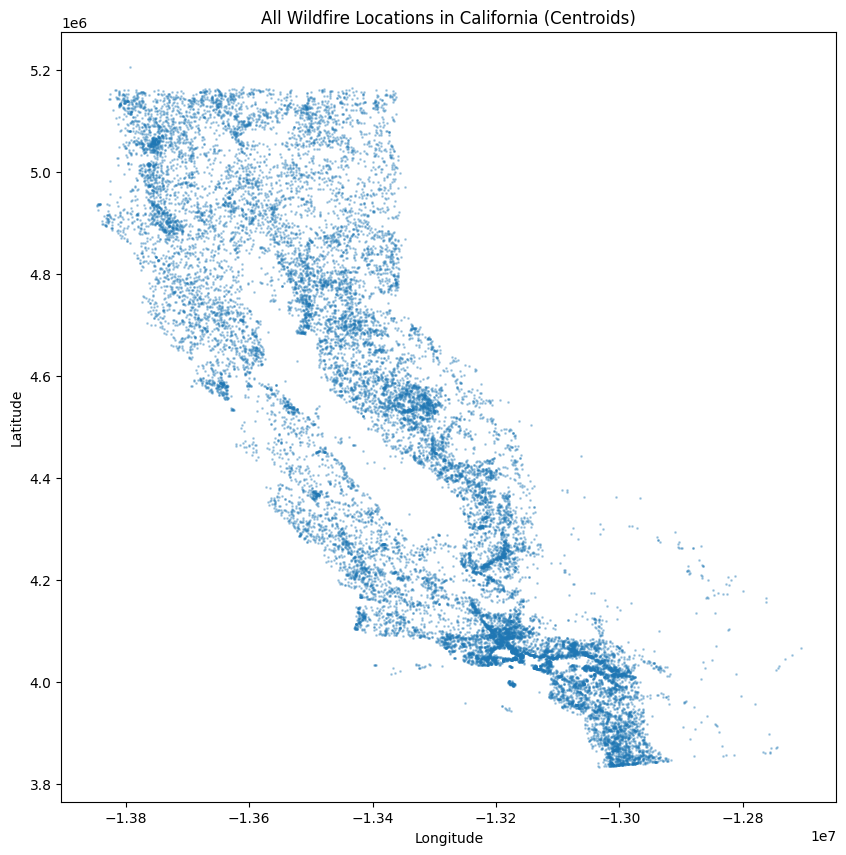

In [8]:
gdf2['centroid'] = gdf2.geometry.centroid
gdf2['lon'] = gdf2.centroid.x
gdf2['lat'] = gdf2.centroid.y
gdf2 = gdf2.dropna(subset=['lon', 'lat'])
plt.figure(figsize=(10, 10))
plt.scatter(gdf2['lon'], gdf2['lat'], s=1, alpha=0.3)
plt.title("All Wildfire Locations in California (Centroids)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [9]:
# load in counties map file
gdf_counties = gpd.read_file("CA_Counties.shp")

# Perform spatial join between fires (centroids) and counties
gdf_fires_county = gpd.sjoin(gdf2.set_geometry("centroid"), gdf_counties, how="left", predicate="intersects")

# Aggregate fire occurrences by county
county_fire_counts = gdf_fires_county.groupby("NAME")["gis_acres"].sum().reset_index()

# Merge aggregated data with counties file
gdf_merged = gdf_counties.merge(county_fire_counts, left_on="NAME", right_on="NAME")

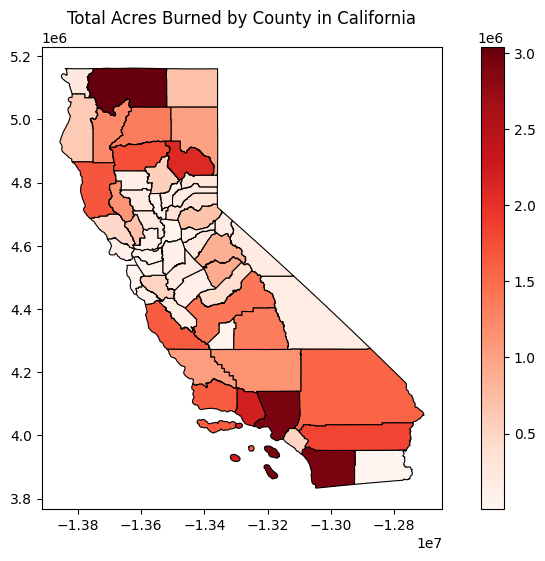

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf_merged.plot(column="gis_acres", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
ax.set_title("Total Acres Burned by County in California")
plt.show()

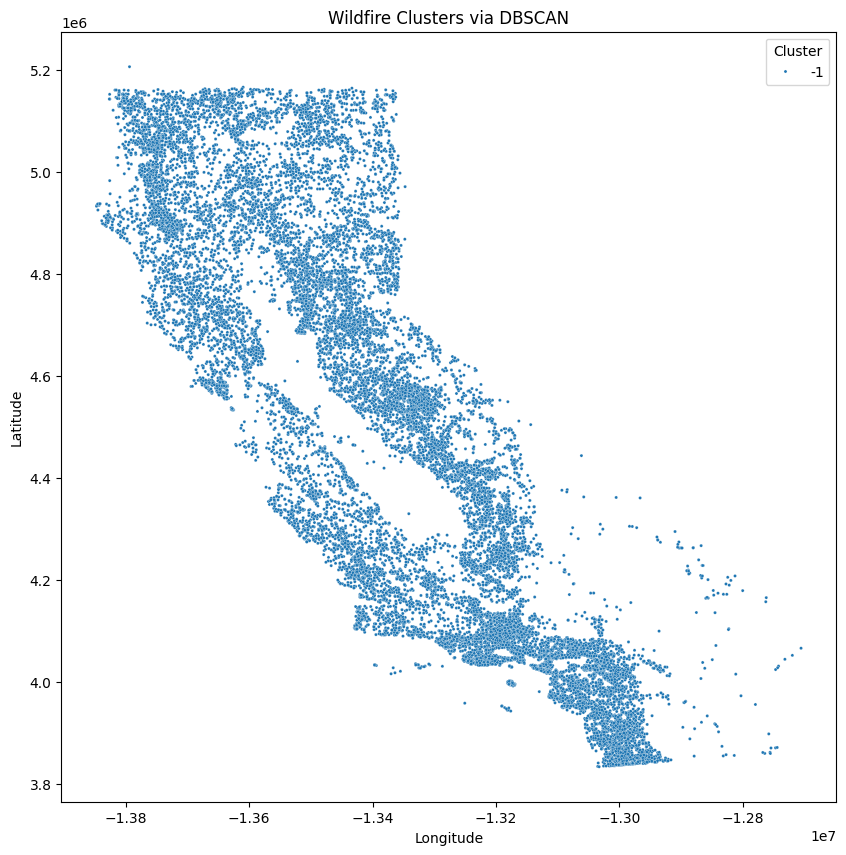

In [11]:
# Prepare the coordinates
coords = gdf2[['lat', 'lon']].to_numpy()

# Set DBSCAN parameters (eps is in degrees)
db = DBSCAN(eps=0.1, min_samples=10).fit(coords)

# Assign cluster labels
gdf2['cluster'] = db.labels_

plt.figure(figsize=(10, 10))
sns.scatterplot(data=gdf2, x='lon', y='lat', hue='cluster', palette='tab20', s=5)
plt.title("Wildfire Clusters via DBSCAN")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1, 1))
plt.show()

In [12]:
# Count fires per cluster
hotspot_counts = gdf2['cluster'].value_counts().sort_values(ascending=False)
print(hotspot_counts.head(10))

cluster
-1    22810
Name: count, dtype: int64


#### Summary (Geospatial Analysis):

Mapping revealed consistent wildfire hotspots in Northern and Central California. Choropleth visualizations highlighted counties with the highest fire counts and burned acreage. Cluster analysis using DBSCAN further identified spatial clusters of ignition points, confirming the presence of geographic zones with recurring fire activity, often near the wildland-urban interface.

### d. Time Series Analysis
#### Introduction:

Wildfires are not only increasing but also changing in terms of when they occur. This section analyzes fire seasonality, year-over-year trends, and rolling averages to detect shifts in the timing and length of fire seasons. 

In [13]:
# Extract month from alarm_date
gdf2['month'] = gdf2['alarm_date'].dt.month

# Removing date: 1899-12-30 due to issues within dataset
gdf2 = gdf2[gdf2['alarm_date'] != '1899-12-30']

# Aggregate data
monthly_fire_counts = gdf2.groupby('month').size()
monthly_acres_burned = gdf2.groupby('month')['gis_acres'].sum()

gdf2['month'].value_counts()

month
7     4127
8     3763
6     2819
9     2619
10    1288
5     1154
11     552
4      376
12     242
3      178
1      176
2      120
Name: count, dtype: int64

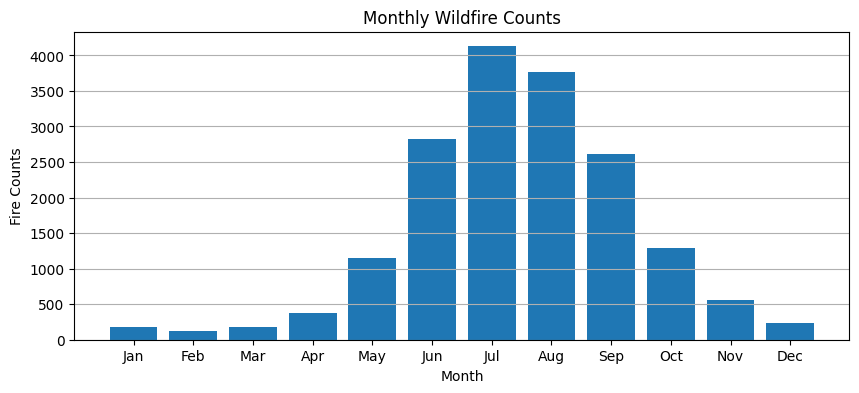

In [14]:
plt.figure(figsize=(10, 4))
plt.bar(monthly_fire_counts.index, monthly_fire_counts.values, color='tab:blue')
plt.xlabel('Month')
plt.ylabel('Fire Counts')
plt.title('Monthly Wildfire Counts')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

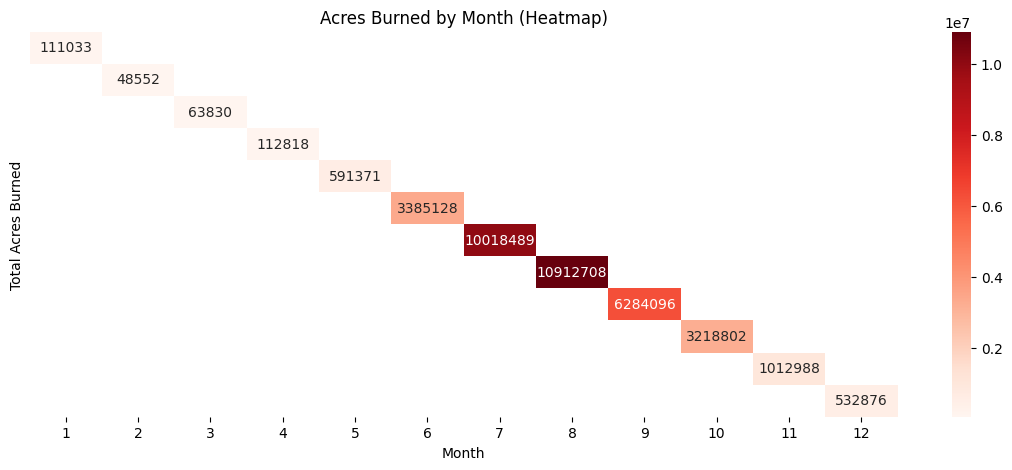

In [15]:
month_data = pd.DataFrame({'Month': monthly_acres_burned.index, 'Acres Burned': monthly_acres_burned.values})
month_data_pivot = month_data.pivot(columns='Month', values='Acres Burned')

plt.figure(figsize=(14, 5))
sns.heatmap(month_data_pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title('Acres Burned by Month (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Total Acres Burned')
plt.yticks([])
plt.show()

#### Summary (Time Series Analysis):

When exploring seasonal wildfire patterns, I noticed an unusually high number of fires recorded in December. After digging into the data, I found that over 5,000 of these fires were marked with the placeholder date 1899-12-30, which clearly doesn't represent real events. I removed these rows from our analysis to avoid skewing the results. After cleanup, the data showed that wildfire activity mainly peaks from June to September, which aligns with California’s known fire season.

### e. Climate–Wildfire Interaction
#### Introduction:

Wildfires are closely linked to climatic conditions such as temperature, wind, and drought. This section quantifies the relationship between environmental variables and fire outcomes using correlation matrices and simple regression models. The goal is to determine which climate factors most strongly influence fire size and frequency.

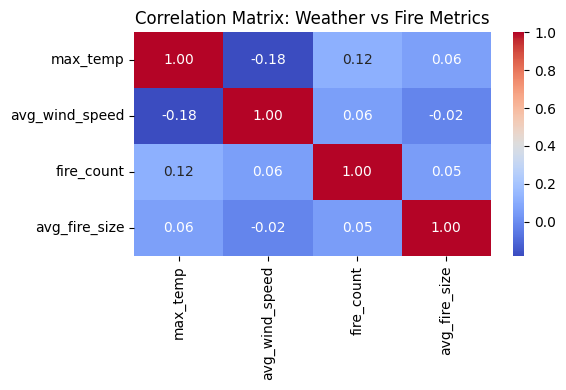

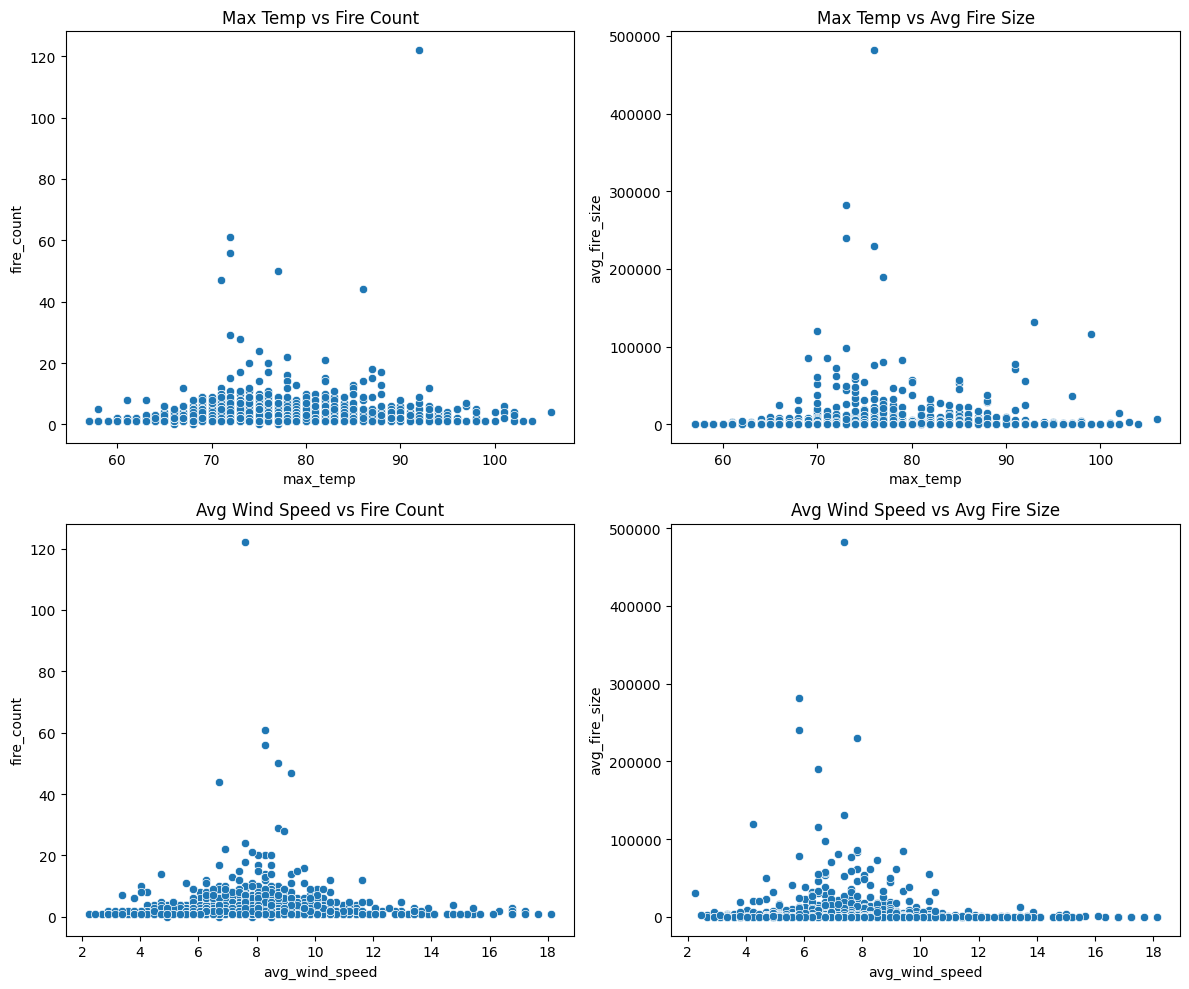

In [16]:
# Convert and extract date from fire data
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df2['date'] = pd.to_datetime(df2['alarm_date'], errors='coerce').dt.normalize()

# Aggregate fire data by date using 'fire_name' and 'gis_calculated_acres'
daily_fire_stats = df2.groupby('date').agg(
    fire_count=('fire_name', 'count'),
    avg_fire_size=('gis_calculated_acres', 'mean')
).reset_index()

# Merge weather and fire data on date
merged_df = pd.merge(df1, daily_fire_stats, on='date', how='inner')

# Select only relevant columns for correlation
correlation_data = merged_df[['max_temp', 'avg_wind_speed', 'fire_count', 'avg_fire_size']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Weather vs Fire Metrics")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=merged_df, x='max_temp', y='fire_count', ax=axs[0, 0])
axs[0, 0].set_title('Max Temp vs Fire Count')

sns.scatterplot(data=merged_df, x='max_temp', y='avg_fire_size', ax=axs[0, 1])
axs[0, 1].set_title('Max Temp vs Avg Fire Size')

sns.scatterplot(data=merged_df, x='avg_wind_speed', y='fire_count', ax=axs[1, 0])
axs[1, 0].set_title('Avg Wind Speed vs Fire Count')

sns.scatterplot(data=merged_df, x='avg_wind_speed', y='avg_fire_size', ax=axs[1, 1])
axs[1, 1].set_title('Avg Wind Speed vs Avg Fire Size')

plt.tight_layout()
plt.show()

#### Summary (Climate–Wildfire Interaction):

To explore how weather affects wildfire behavior, I analyzed the relationship between two key climate variables — maximum daily temperature and average wind speed — with wildfire activity. I generated scatter plots comparing these weather factors against both fire countand average fire size, alongside a correlation matrix to quantify the strength of these relationships. From the plots, I observed a mild positive relationship between maximum temperature and fire count, suggesting that hotter days may be associated with increased wildfire activity. However, this trend is relatively weak and not strongly predictive. Wind speed showed no clear correlation with fire size or count. Most fires occurred under moderate wind conditions, and extreme wind values did not consistently align with higher fire activity. The correlation matrix confirmed these observations. All variables had low correlation coefficients, with the strongest being between max temperature and fire count (`r = 0.12`). This suggests that while temperature and wind do have some impact, they alone do not strongly explain wildfire patterns. Overall, this section highlights that weather conditions are only a mere contribution, and more complex interactions such as including human factors and land conditions, likely play a significant role in wildfire dynamics.


ariable Pair	Correlation	Interpretation
Max Temp & Fire Count	+0.12	Weak positive correlation — hotter days slightly increase the number of fires.

Max Temp & Avg Fire Size	+0.06	Very weak positive — hotter days may slightly increase fire size, but not strongly.

Wind Speed & Fire Count	+0.06	Very weak positive — wind may slightly contribute to more fires.

Wind Speed & Fire Size	−0.02	Essentially no correlation — wind speed doesn’t seem to affect fire size.
